<a href="https://colab.research.google.com/github/sejaldb/stp_aiml/blob/main/module3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization

---

## Binary Classification Task: Diabetes Dataset

We’ll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.



# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
diabetes_data = pd.read_csv('diabetes.csv')

In [ ]:
# View top 10 rows of the Diabetes dataset
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Identification of variables and data types

In [ ]:
diabetes_data.shape

(768, 9)

Dataset comprises of 768 observations and 9 fields.

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
* **BloodPressure:** Diastolic blood pressure (mm Hg). 120/80 is normal BP level for females above 18 years old.
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
* **BMI:** Body mass index (weight in kg/((height in m$)^2$))
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (in years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


In [ ]:
# Get the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Let us see distribution and also boxplot for outliers of feature "Pregnancies".

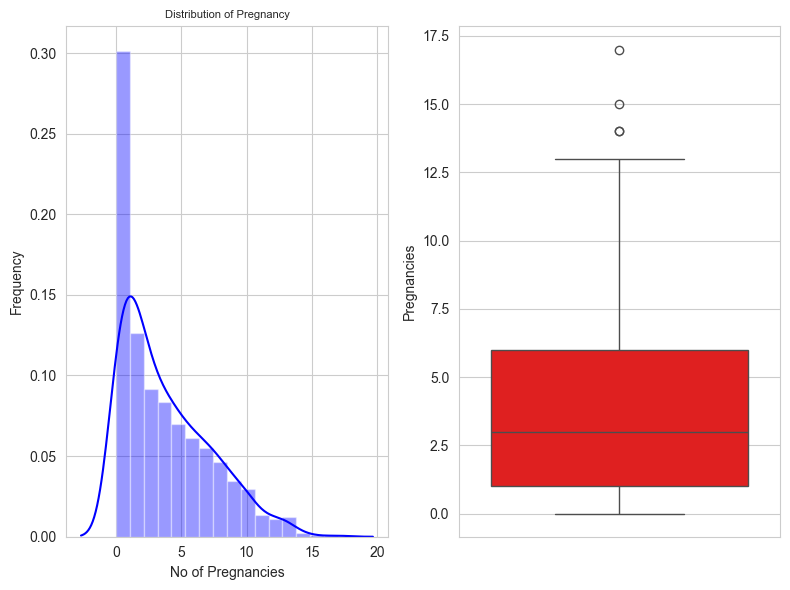

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot(data=diabetes_data['Pregnancies'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

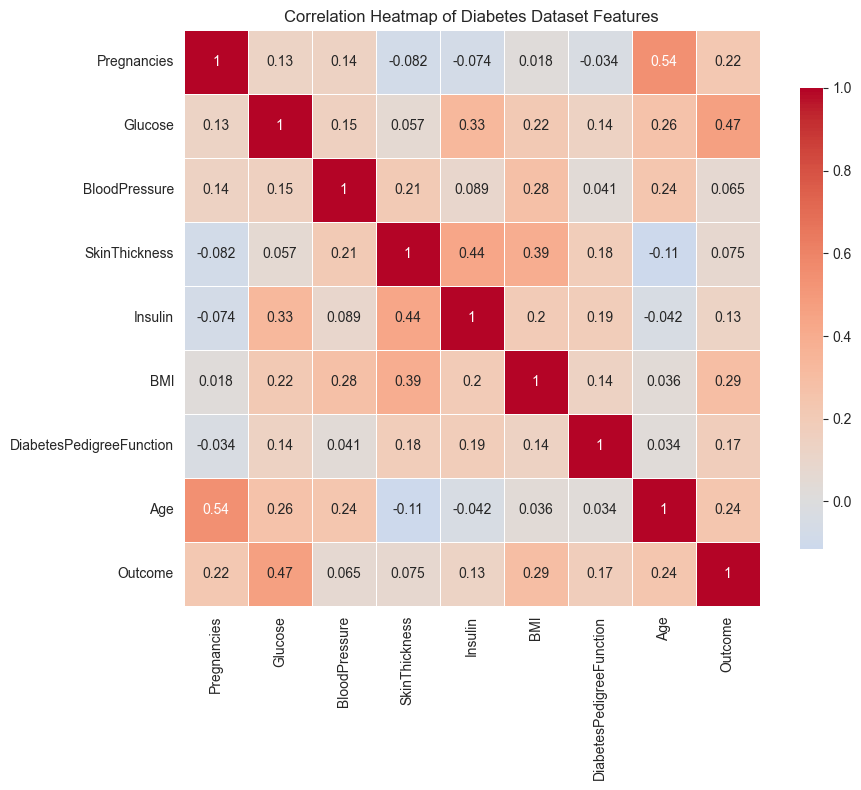

In [ ]:
## TASK-1 :
## Find out the "Correlation" between the different attributes present in the data.
## Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.tight_layout()
plt.show()

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

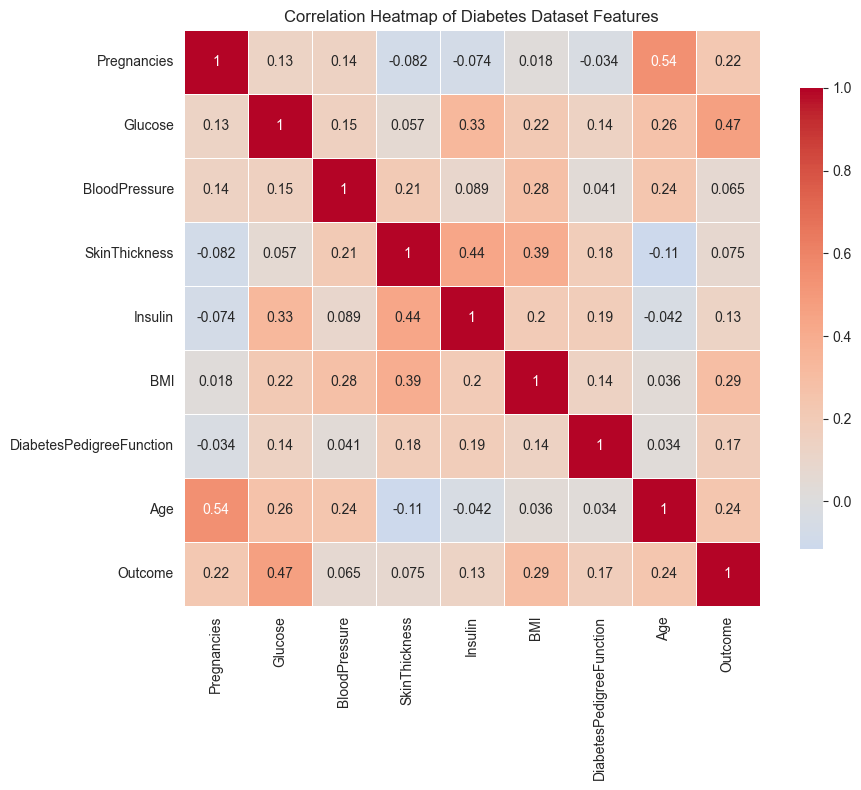

In [ ]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.tight_layout()
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

* From the correlation map you just obtained above, it seems that Insulin is highly correlated with Glucose, BMI and Age. It means that as the values of glucose, BMI and Age increase, the insulin is also increasing. It seems logical also that overweight and elderly people might have a higher level of insulin in their bodies.  

* In the same way SkinThickness is highly correlated with BMI.

## Checking  if the data is balanced or imbalanced

We can produce a seaborn count plot to check if the output is dominated by one of the classes or not.

Outcome
0    500
1    268
Name: count, dtype: int64


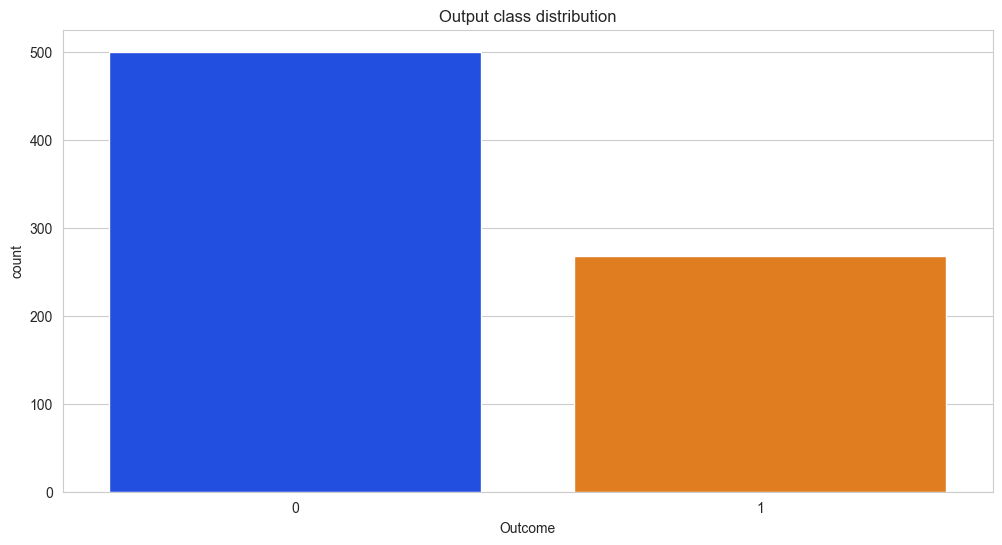

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes.

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

## Scatter matrix of data

A pair-plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

<Figure size 1500x1200 with 0 Axes>

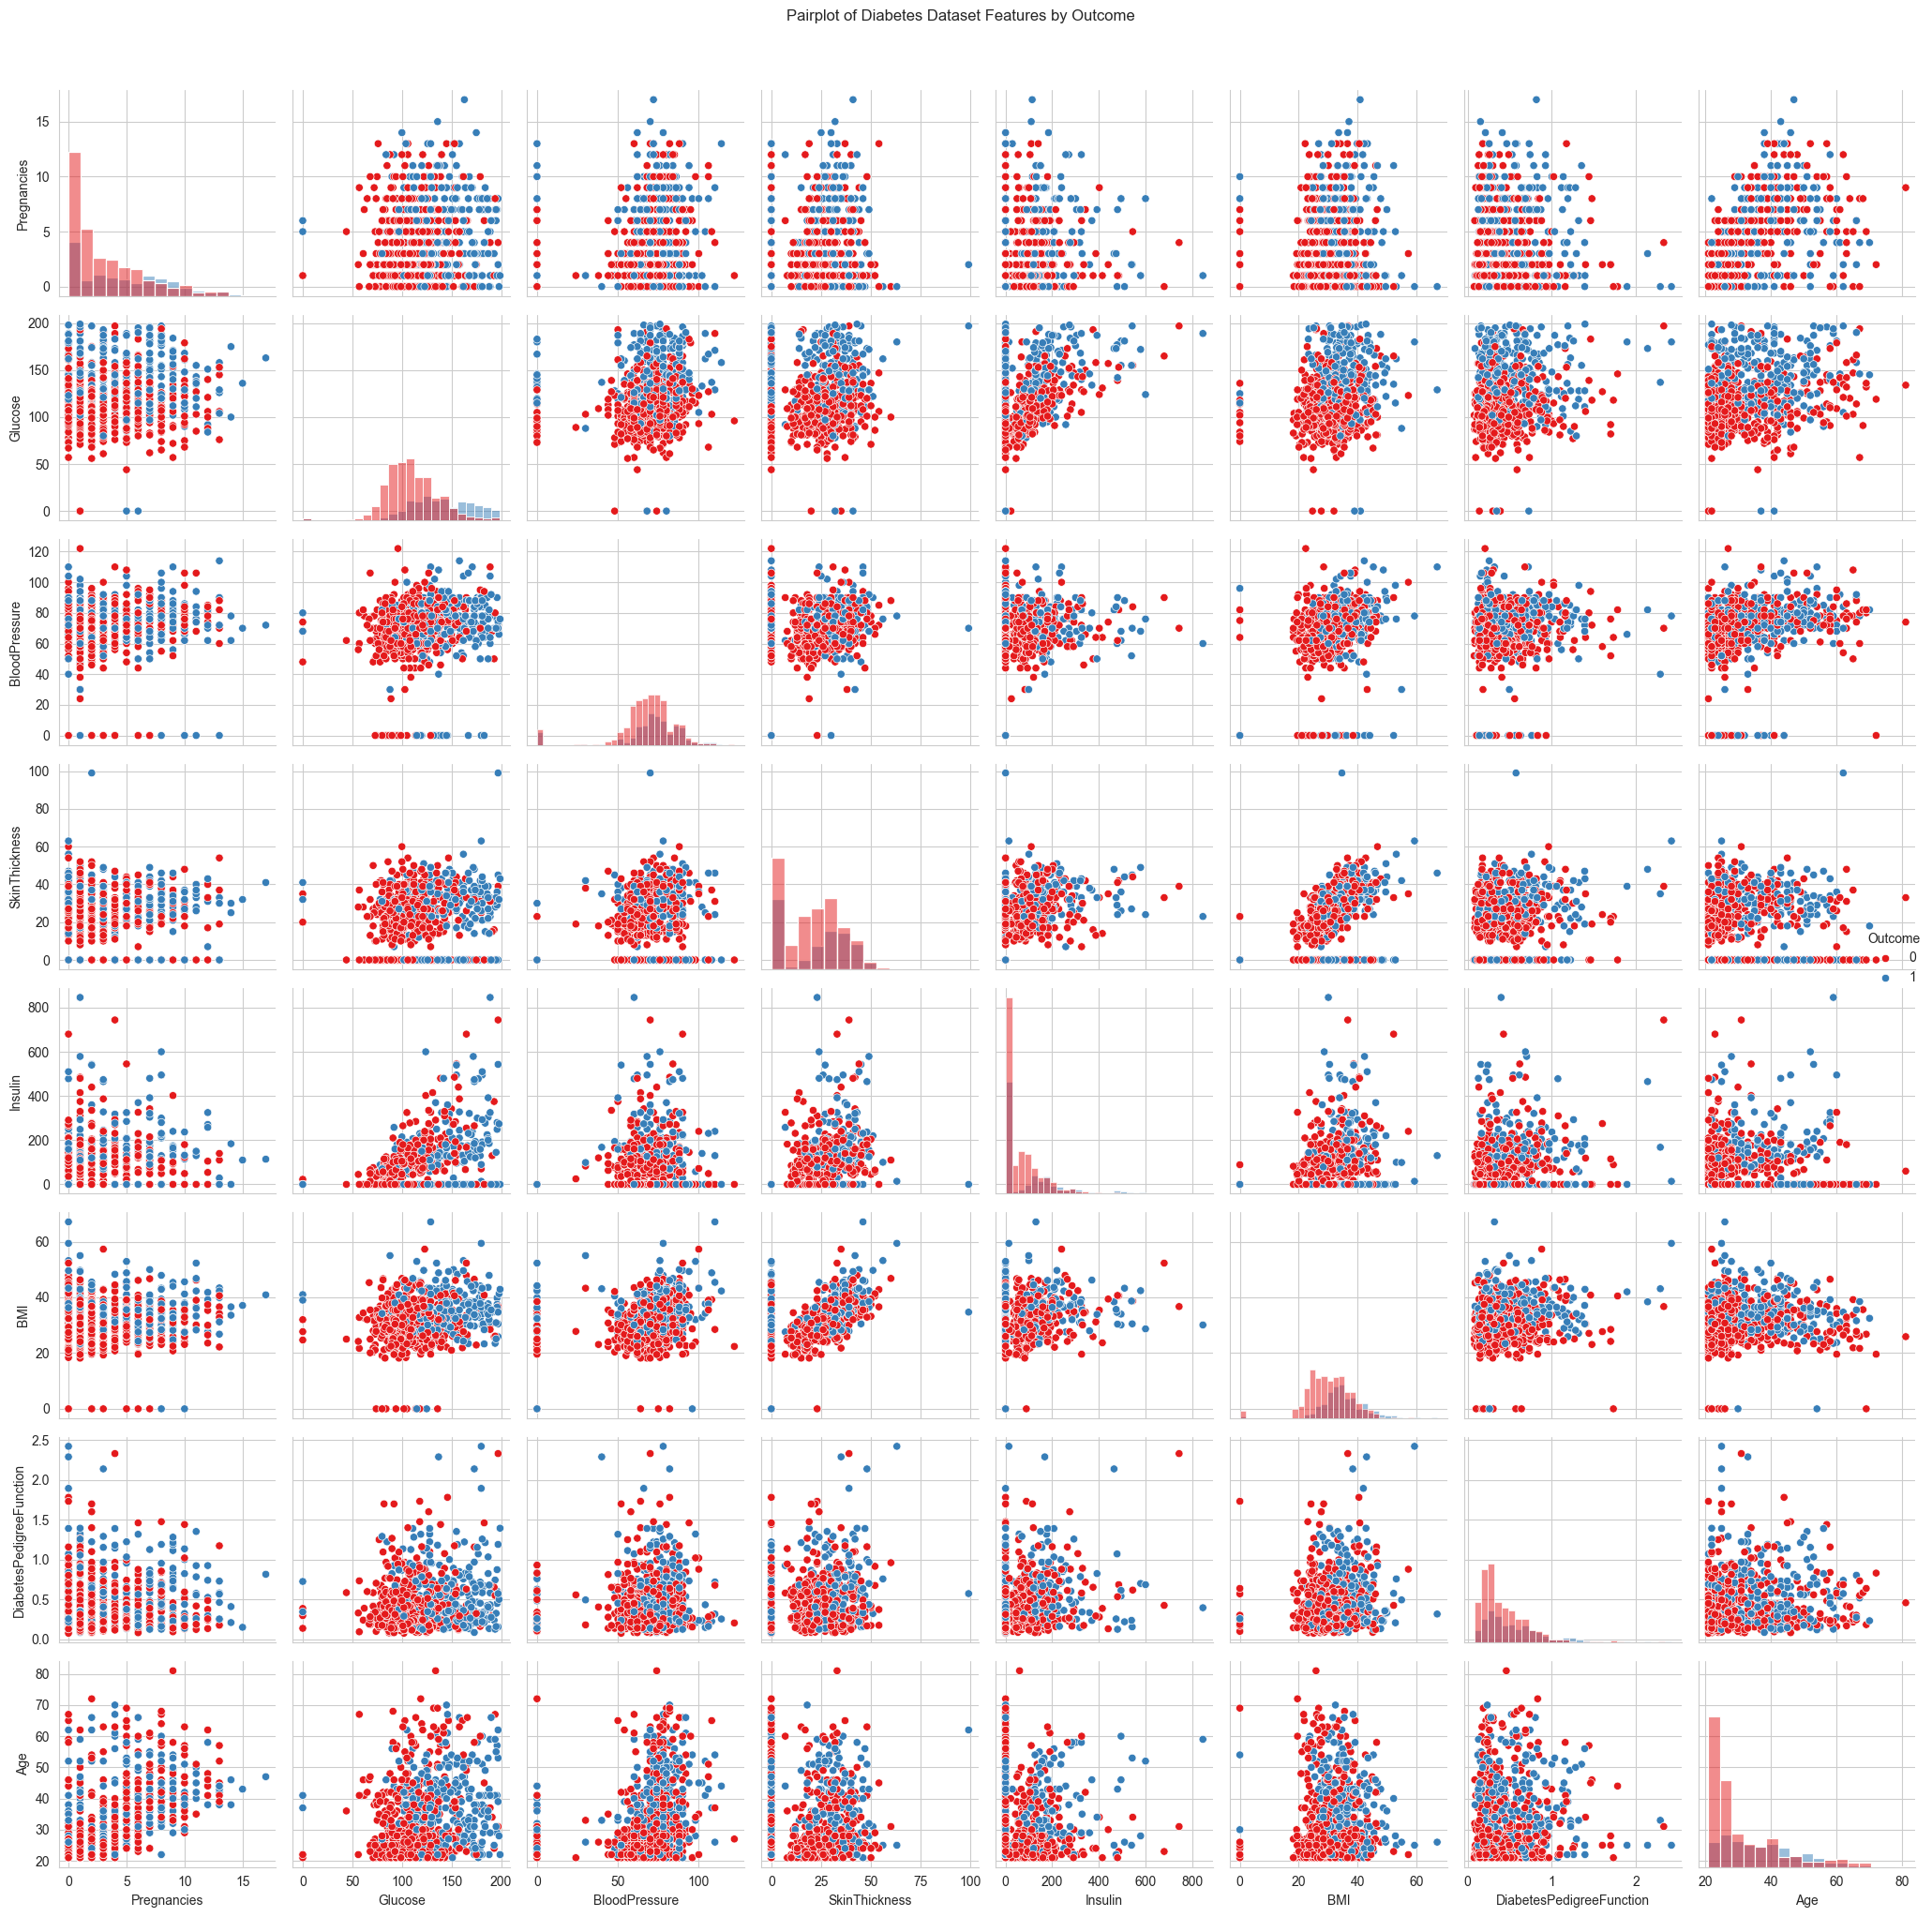

In [ ]:
# Create pairplot with outcome as hue
plt.figure(figsize=(15, 12))
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='hist', palette='Set1')
plt.suptitle('Pairplot of Diabetes Dataset Features by Outcome', y=1.02)
plt.tight_layout()
plt.show()

## BMI vs Outcome

<Axes: xlabel='Outcome', ylabel='BMI'>

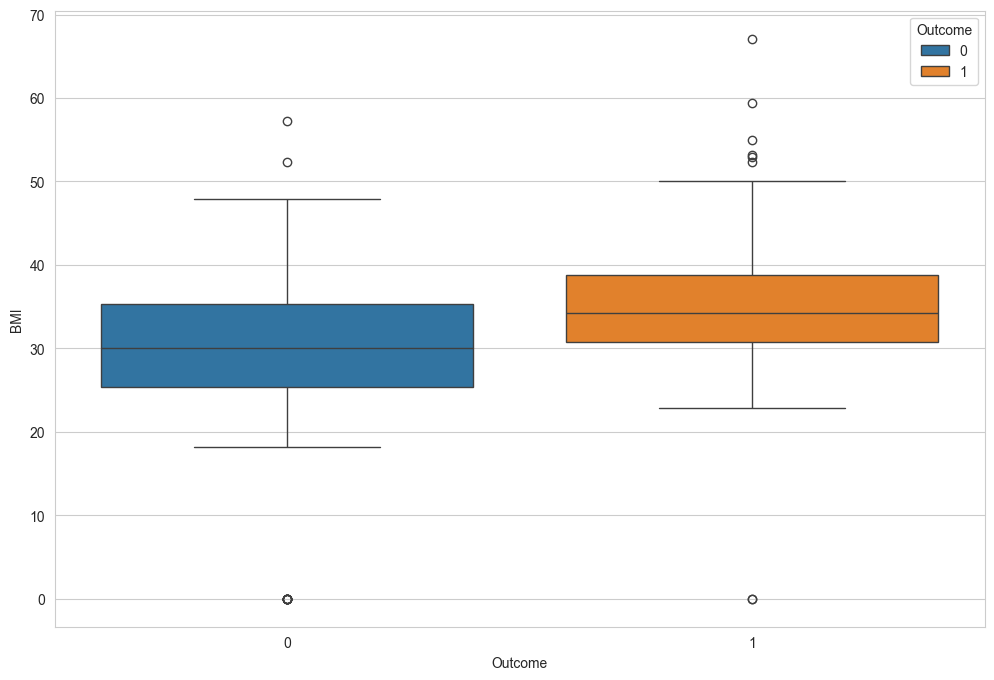

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## Pedigree function vs Diabetes

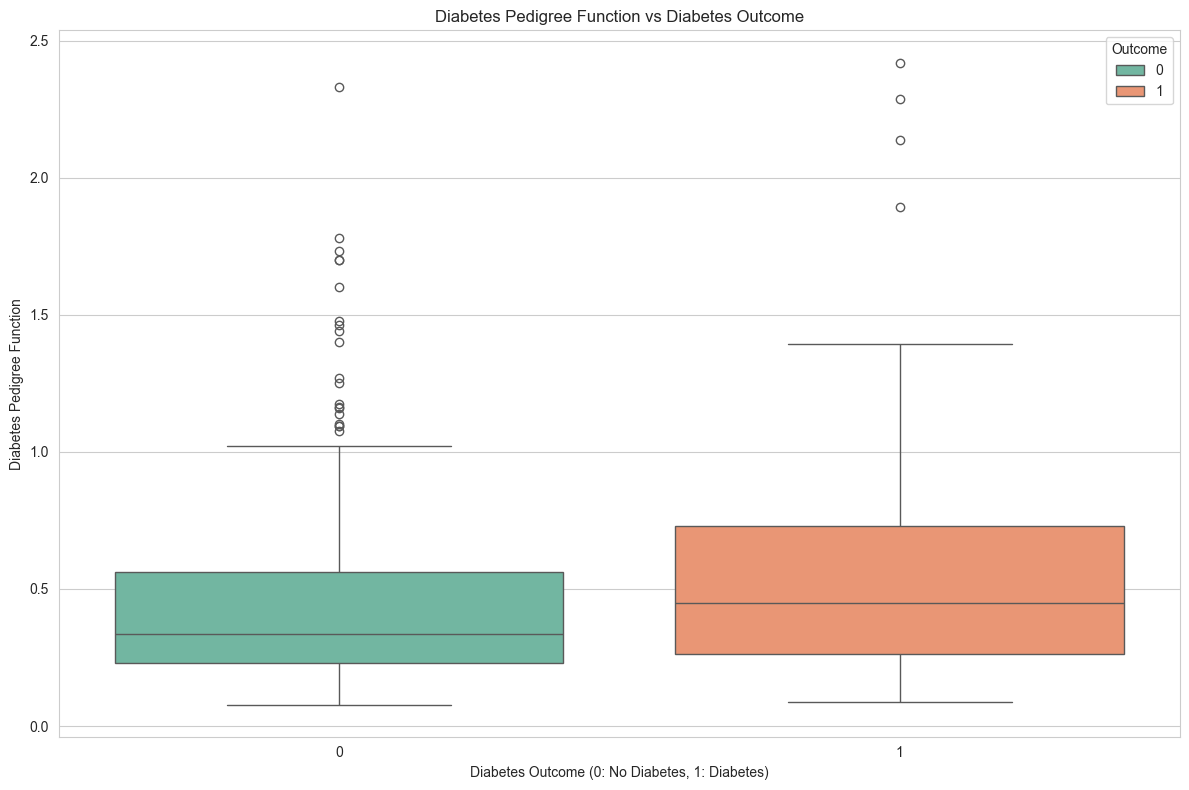

In [ ]:
# Display boxplot between Pedigree function and Diabetes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_data, hue='Outcome', palette='Set2')
plt.title('Diabetes Pedigree Function vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.tight_layout()
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to have lower pedigree functions than those who tested positive. This indicates that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

## Pregnancy vs Diabetes

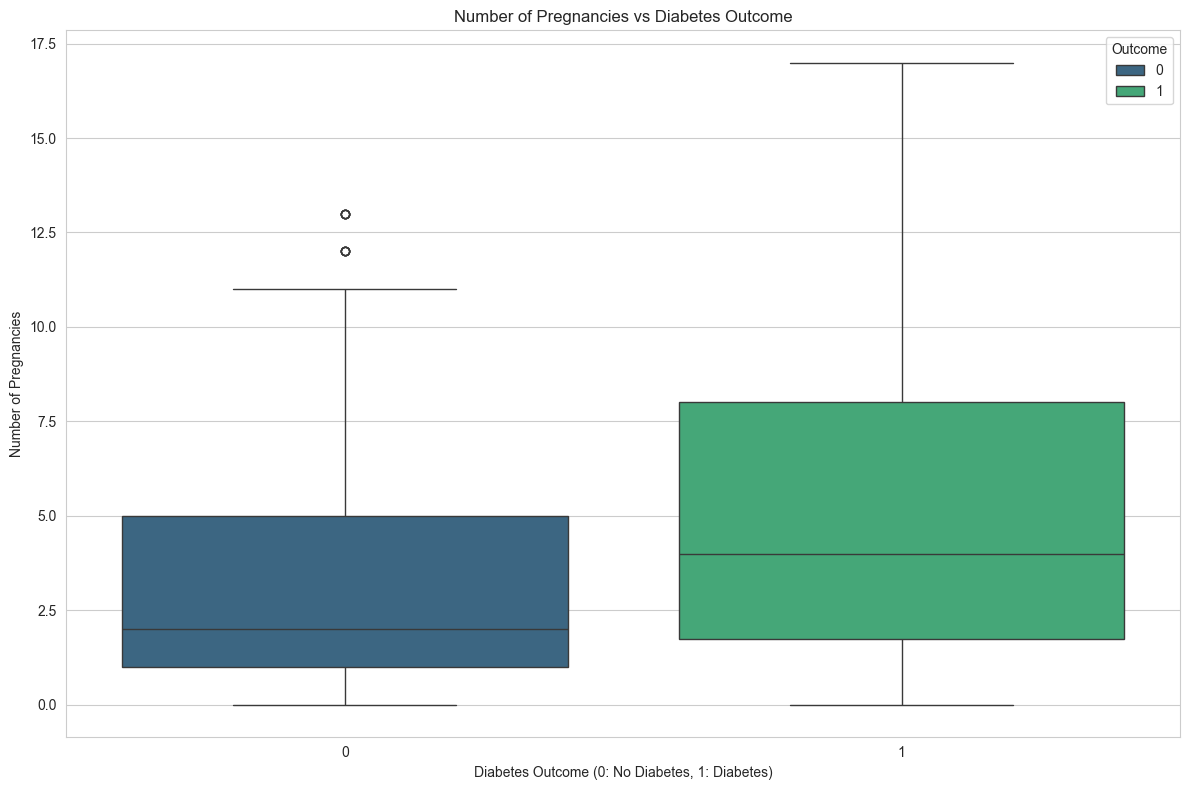

In [ ]:
# Display boxplot between number of Pregnancies and Diabetes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_data, hue='Outcome', palette='viridis')
plt.title('Number of Pregnancies vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Number of Pregnancies')
plt.tight_layout()
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The average number of pregnancies is higher in diabetic as compared to non-diabetic women.

## Prevalence of Diabetes vs BMI

Let's try to find out the prevalence of diabetes and its relation to their BMI. Please note that the range of normal BMI is 18.5 to 25.

In [ ]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

Outcome
0    101
1      7
Name: count, dtype: int64

In [ ]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

Outcome
0    399
1    261
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='BMI'>

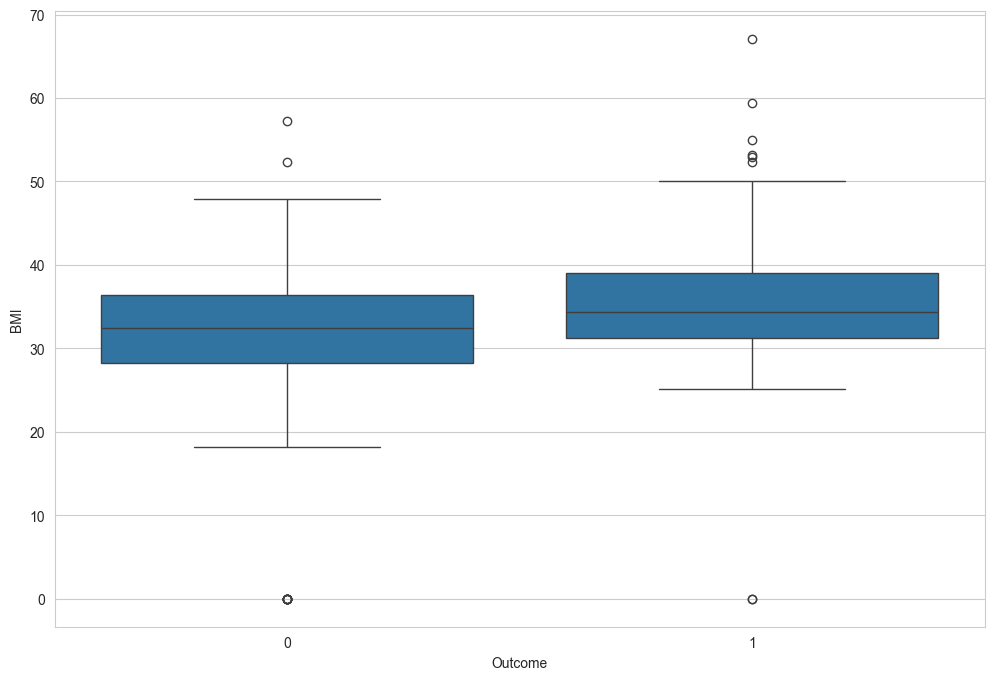

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The Body Mass Index (BMI) shows a significant association with the occurrence of diabetes.  
The interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.


## Age vs Diabetes

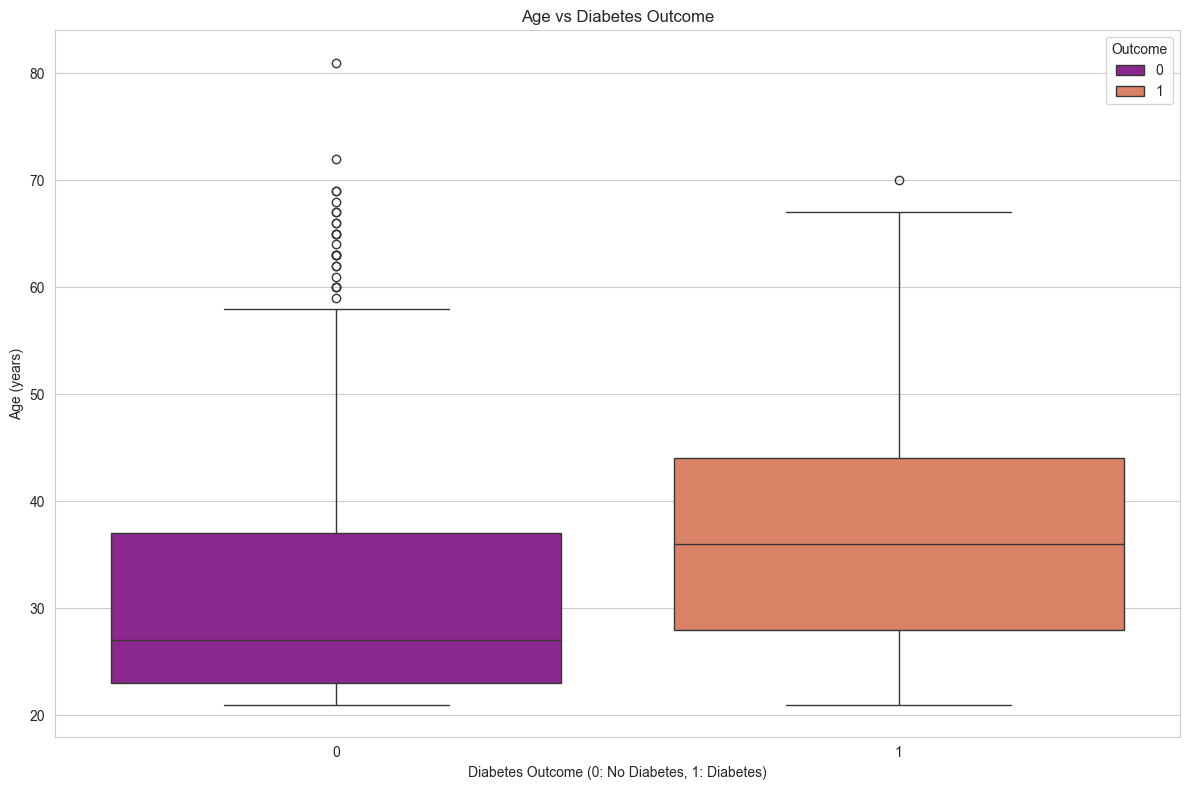

In [ ]:
# Display boxplot between Age and Diabetes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Age', data=diabetes_data, hue='Outcome', palette='plasma')
plt.title('Age vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Age (years)')
plt.tight_layout()
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.

# The Importance of Standardizing Data

In [ ]:
unchanged_data = diabetes_data.drop('Outcome',axis=1)

In [ ]:
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

*Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.*

In [ ]:
##########################
##########################

## TASK-6 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################


def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

  for i in range(1,40):
      ## [REQUIRED] Complete the code in the next three lines
      knn = KNeighborsClassifier(n_neighbors=i)  # Initialize the KNN classifier with 'i' neighbours
      knn.fit(X_train, y_train)  # Fit the KNN model on the training set
      pred_i = knn.predict(X_test)  # Make predictions on the test set using KNN

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores

In [ ]:
#@title Answer to Task-6. Refer to and run this only if you are unable to complete the task in the previous cell.
def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

  for i in range(1,40):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


Max train score 100.0 % and k = [1]

Max test score 75.32467532467533 % and k = [9, 18, 34]


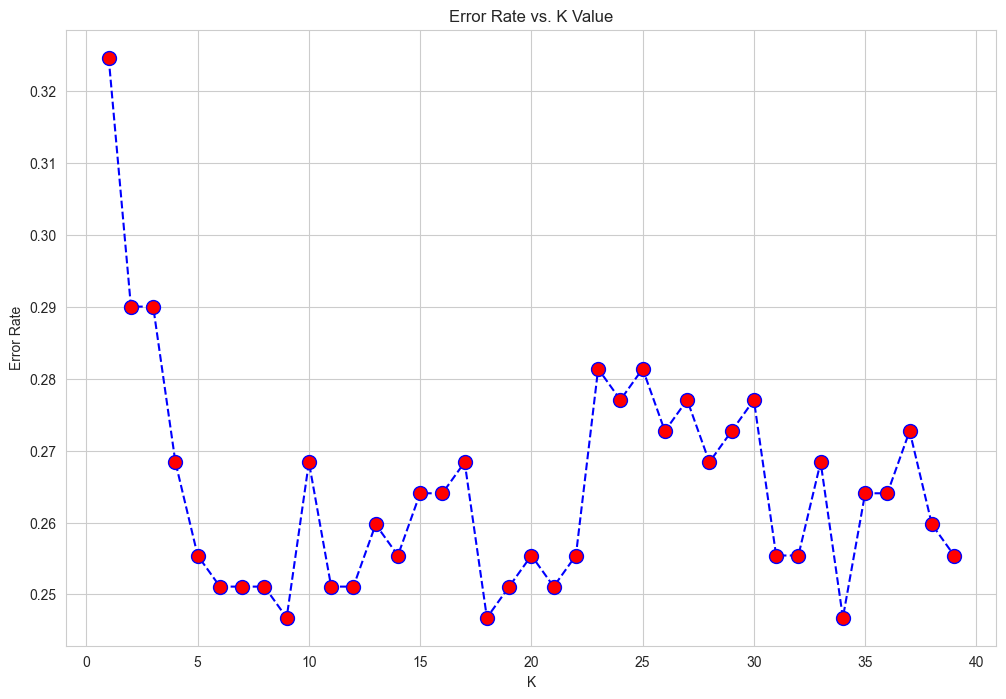

In [ ]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ Z = {X - \mu \over \sigma}$$


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

,copy,True
,with_mean,True
,with_std,True


In [ ]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496



Max train score 100.0 % and k = [1]

Max test score 77.48917748917748 % and k = [9, 31, 33]


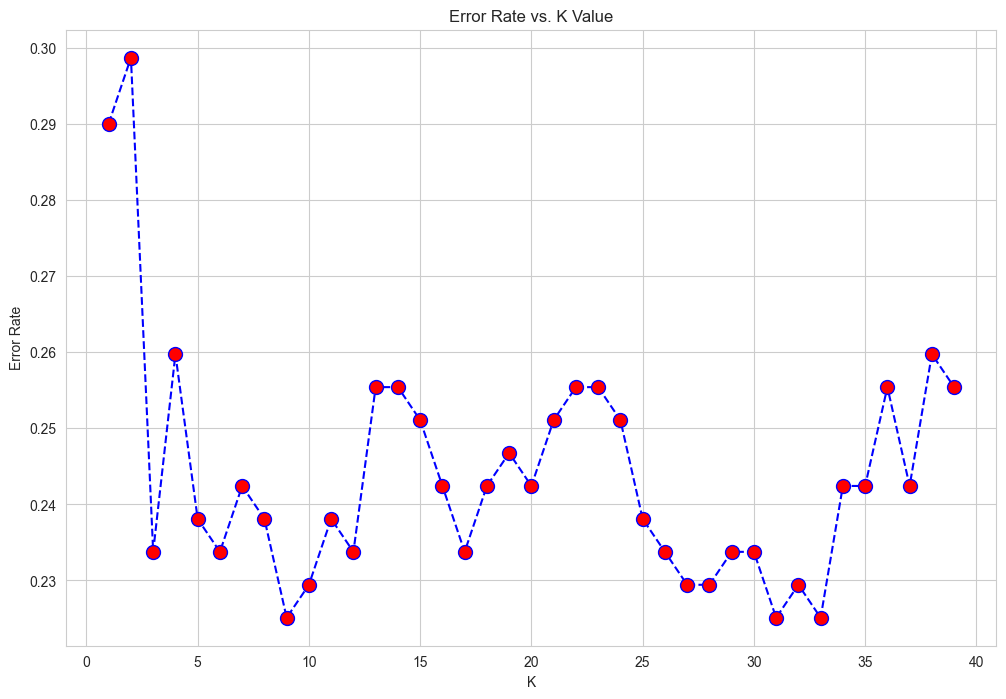

In [ ]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

## Comparing Accuracy before and after Standardization

<Axes: title={'center': 'Accuracy vs. K Value'}>

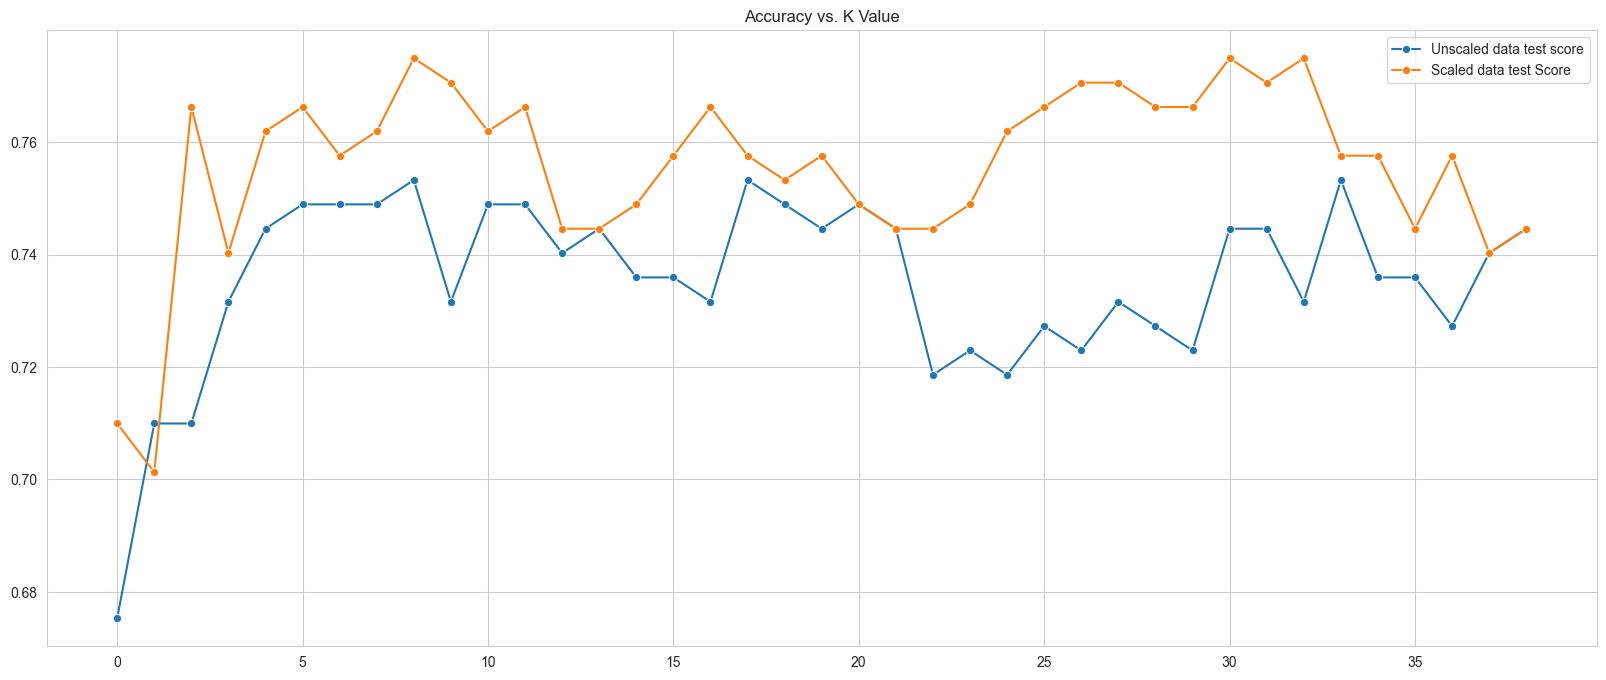

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')

MinMax Scaled Data (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  

KNN Performance on MinMax Scaled Data:

Max train score 100.0 % and k = [1]

Max test score 77.92207792207793 % and k = [10]

Max train score 100.0 % and k = [1]

Max test score 77.92207792207793 % and k = [10]


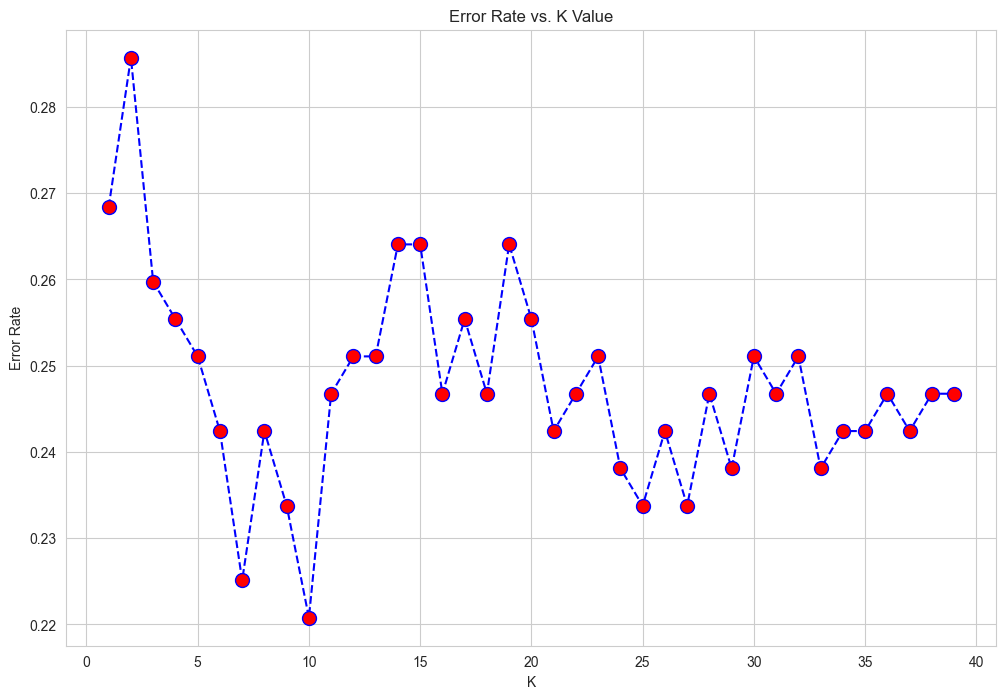

In [ ]:
# TASK-7: Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMax scaler
minmax_scaler = MinMaxScaler()

# Fit and transform the data (excluding the target variable 'Outcome')
minmax_scaled_data = minmax_scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))

# Create DataFrame with scaled data for better visualization
df_minmax = pd.DataFrame(minmax_scaled_data, columns=diabetes_data.columns[:-1])
print("MinMax Scaled Data (first 5 rows):")
print(df_minmax.head())

# Test KNN performance on MinMax scaled data
print("\n" + "="*50)
print("KNN Performance on MinMax Scaled Data:")
print("="*50)

minmax_test_scores = plot_KNN_error_rate(minmax_scaled_data, diabetes_data['Outcome'])

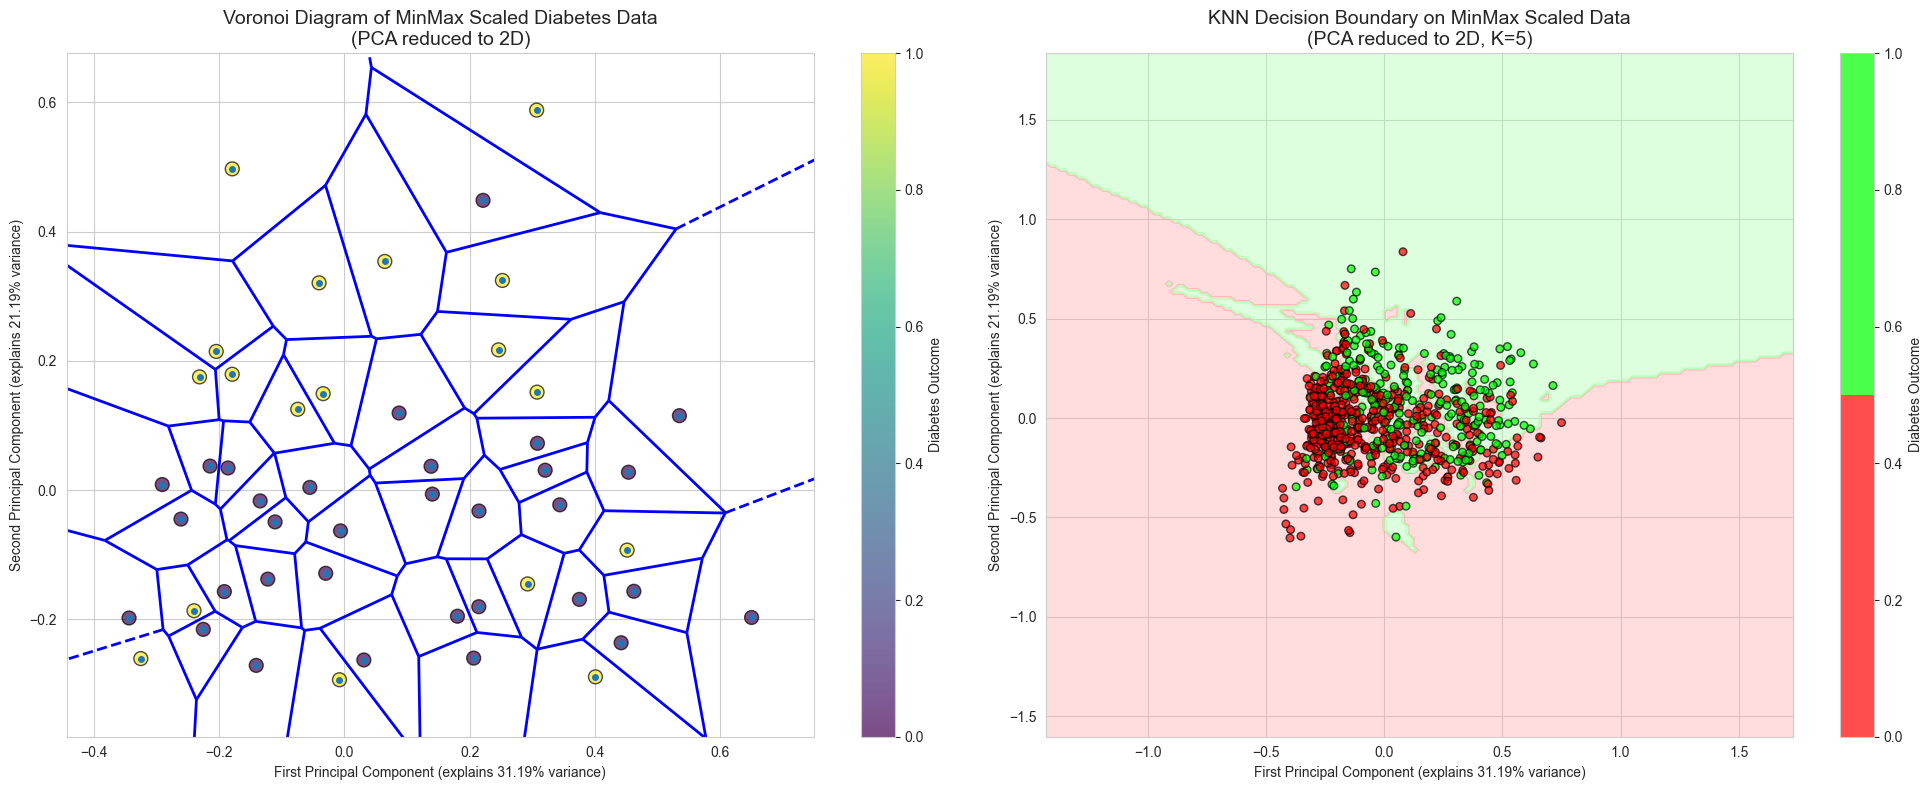

PCA Explained Variance Ratio: [0.31192249 0.21186663]
Total Variance Explained: 52.38%


In [ ]:
# TASK-8: Plot the Voronoi diagram for the MinMax scaled data

from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
minmax_2d = pca.fit_transform(minmax_scaled_data)

# Create a subset of data for better visualization (too many points make Voronoi diagram cluttered)
np.random.seed(42)
subset_indices = np.random.choice(len(minmax_2d), size=50, replace=False)
subset_points = minmax_2d[subset_indices]
subset_labels = diabetes_data['Outcome'].iloc[subset_indices]

# Create Voronoi diagram
vor = Voronoi(subset_points)

# Plot Voronoi diagram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Voronoi diagram with regions
voronoi_plot_2d(vor, ax=ax1, show_vertices=False, line_colors='blue', line_width=2, point_size=8)
scatter1 = ax1.scatter(subset_points[:, 0], subset_points[:, 1],
                      c=subset_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
ax1.set_title('Voronoi Diagram of MinMax Scaled Diabetes Data\n(PCA reduced to 2D)', fontsize=14)
ax1.set_xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter1, ax=ax1, label='Diabetes Outcome')

# Plot 2: Just the data points with KNN decision boundary
from matplotlib.colors import ListedColormap

# Create a mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = minmax_2d[:, 0].min() - 1, minmax_2d[:, 0].max() + 1
y_min, y_max = minmax_2d[:, 1].min() - 1, minmax_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train KNN on 2D PCA data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(minmax_2d, diabetes_data['Outcome'])

# Predict on mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

ax2.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
scatter2 = ax2.scatter(minmax_2d[:, 0], minmax_2d[:, 1],
                      c=diabetes_data['Outcome'], cmap=cmap_bold, alpha=0.7, s=30, edgecolors='black')
ax2.set_title('KNN Decision Boundary on MinMax Scaled Data\n(PCA reduced to 2D, K=5)', fontsize=14)
ax2.set_xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter2, ax=ax2, label='Diabetes Outcome')

plt.tight_layout()
plt.show()

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")

EXPERIMENT 1: Original Unscaled Data

K-Fold Cross Validation Results for Unscaled Data
K= 1: Mean Accuracy = 0.6796 (±0.0391) [Min: 0.6209, Max: 0.7403]
K= 3: Mean Accuracy = 0.6953 (±0.0177) [Min: 0.6732, Max: 0.7273]
K= 5: Mean Accuracy = 0.6979 (±0.0335) [Min: 0.6623, Max: 0.7532]
K= 7: Mean Accuracy = 0.7200 (±0.0276) [Min: 0.6732, Max: 0.7468]
K= 7: Mean Accuracy = 0.7200 (±0.0276) [Min: 0.6732, Max: 0.7468]
K= 9: Mean Accuracy = 0.7395 (±0.0249) [Min: 0.7124, Max: 0.7727]
K=11: Mean Accuracy = 0.7460 (±0.0359) [Min: 0.6797, Max: 0.7792]
K=15: Mean Accuracy = 0.7525 (±0.0399) [Min: 0.6928, Max: 0.7987]
K=21: Mean Accuracy = 0.7447 (±0.0256) [Min: 0.7124, Max: 0.7727]

Best K value: 15 with Mean Accuracy: 0.7525


EXPERIMENT 2: Standard Scaled Data

K-Fold Cross Validation Results for Standard Scaled Data
K= 9: Mean Accuracy = 0.7395 (±0.0249) [Min: 0.7124, Max: 0.7727]
K=11: Mean Accuracy = 0.7460 (±0.0359) [Min: 0.6797, Max: 0.7792]
K=15: Mean Accuracy = 0.7525 (±0.0399) [Min: 0

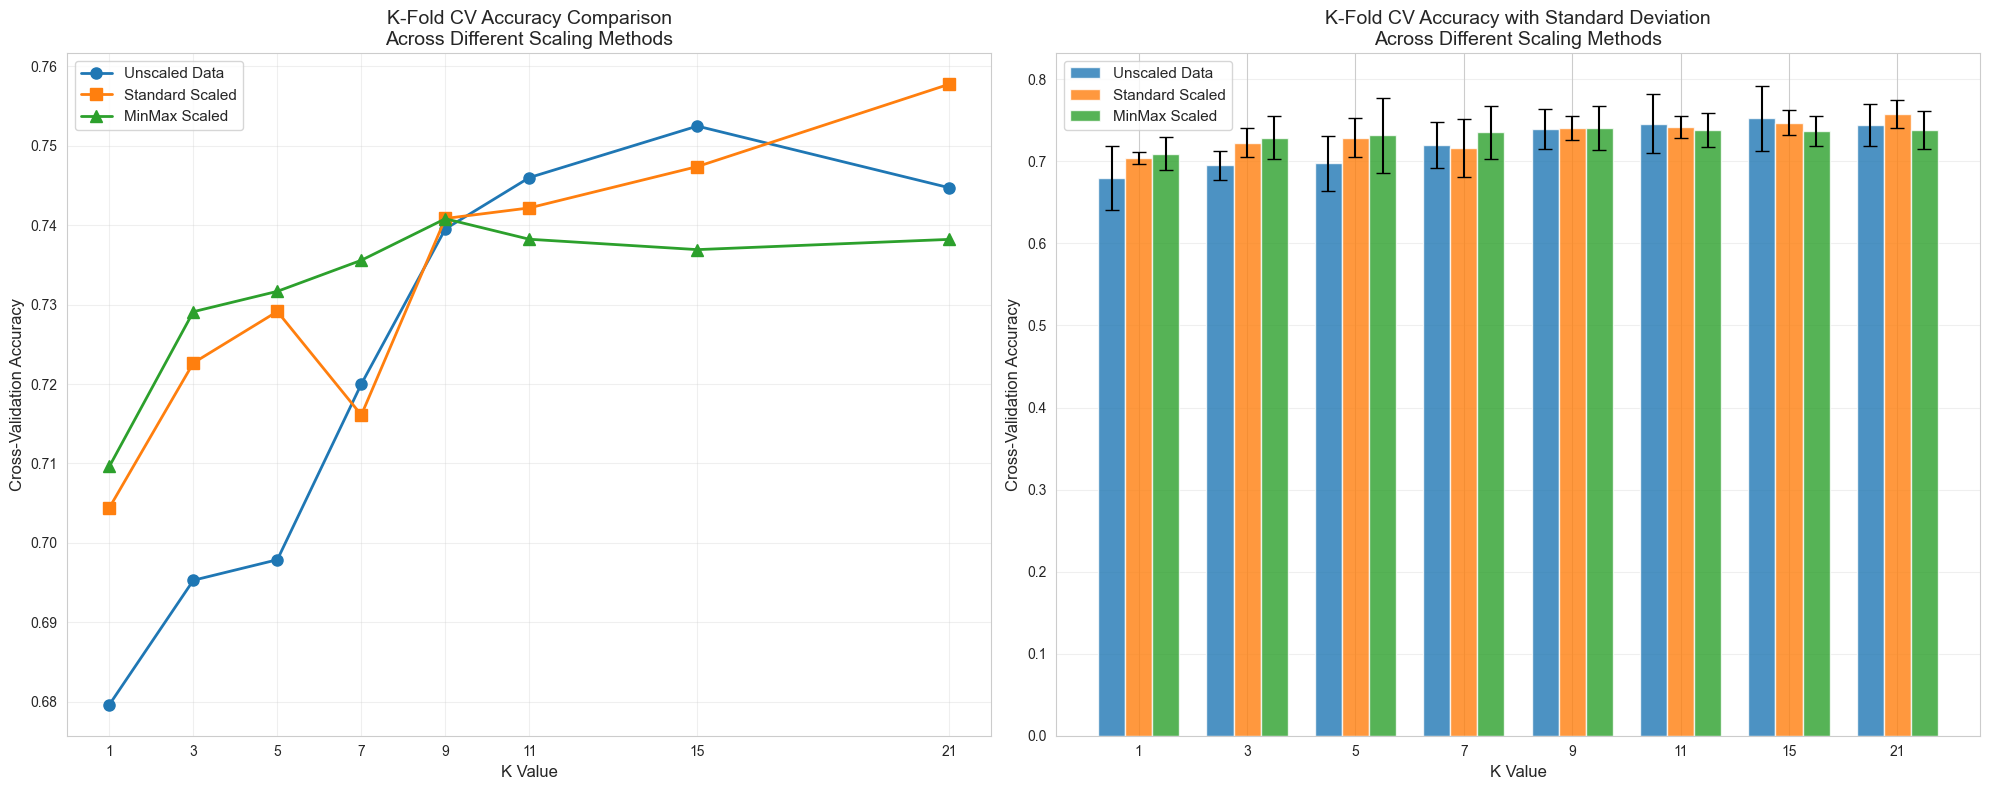


SUMMARY STATISTICS
Best Performance Summary:
Unscaled Data     : K=15, Accuracy=0.7525 (±0.0399)
Standard Scaled   : K=21, Accuracy=0.7578 (±0.0174)
MinMax Scaled     : K= 9, Accuracy=0.7408 (±0.0266)

Overall Best Approach: Standard Scaled with K=21 (Accuracy: 0.7578)

STATISTICAL ANALYSIS
Comparing performance at K=21:
Unscaled vs Standard Scaled - p-value: 0.198945
Unscaled vs MinMax Scaled   - p-value: 0.429420
Standard vs MinMax Scaled   - p-value: 0.009163

Note: p-value < 0.05 indicates statistically significant difference


In [ ]:
# TASK-9: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

def evaluate_knn_with_kfold(X_data, y_data, data_name, k_neighbors=5, cv_folds=5):
    """
    Evaluate KNN classifier using K-Fold cross validation
    """
    print(f"\n{'='*60}")
    print(f"K-Fold Cross Validation Results for {data_name}")
    print(f"{'='*60}")

    # Use StratifiedKFold to maintain class distribution in each fold
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Test different K values
    k_values = [1, 3, 5, 7, 9, 11, 15, 21]
    results = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X_data, y_data, cv=skf, scoring='accuracy')

        results.append({
            'k': k,
            'mean_accuracy': cv_scores.mean(),
            'std_accuracy': cv_scores.std(),
            'min_accuracy': cv_scores.min(),
            'max_accuracy': cv_scores.max(),
            'cv_scores': cv_scores
        })

        print(f"K={k:2d}: Mean Accuracy = {cv_scores.mean():.4f} (±{cv_scores.std():.4f}) "
              f"[Min: {cv_scores.min():.4f}, Max: {cv_scores.max():.4f}]")

    # Find best K value
    best_result = max(results, key=lambda x: x['mean_accuracy'])
    print(f"\nBest K value: {best_result['k']} with Mean Accuracy: {best_result['mean_accuracy']:.4f}")

    return results

# 1. Evaluate on Original (Unscaled) Data
print("EXPERIMENT 1: Original Unscaled Data")
unscaled_results = evaluate_knn_with_kfold(unchanged_data, diabetes_data['Outcome'], "Unscaled Data")

# 2. Evaluate on StandardScaler Data
print("\n\nEXPERIMENT 2: Standard Scaled Data")
standard_results = evaluate_knn_with_kfold(scaled_data, diabetes_data['Outcome'], "Standard Scaled Data")

# 3. Evaluate on MinMaxScaler Data
print("\n\nEXPERIMENT 3: MinMax Scaled Data")
minmax_results = evaluate_knn_with_kfold(minmax_scaled_data, diabetes_data['Outcome'], "MinMax Scaled Data")

# Comparative Analysis
print(f"\n{'='*80}")
print("COMPARATIVE ANALYSIS OF SCALING TECHNIQUES")
print(f"{'='*80}")

# Create comparison DataFrame
comparison_data = []
for k in [1, 3, 5, 7, 9, 11, 15, 21]:
    unscaled_acc = next(r['mean_accuracy'] for r in unscaled_results if r['k'] == k)
    standard_acc = next(r['mean_accuracy'] for r in standard_results if r['k'] == k)
    minmax_acc = next(r['mean_accuracy'] for r in minmax_results if r['k'] == k)

    comparison_data.append({
        'K': k,
        'Unscaled': unscaled_acc,
        'Standard_Scaled': standard_acc,
        'MinMax_Scaled': minmax_acc
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Visualization of Results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Accuracy vs K for different scaling methods
k_values = [1, 3, 5, 7, 9, 11, 15, 21]
unscaled_accs = [r['mean_accuracy'] for r in unscaled_results]
standard_accs = [r['mean_accuracy'] for r in standard_results]
minmax_accs = [r['mean_accuracy'] for r in minmax_results]

ax1.plot(k_values, unscaled_accs, 'o-', label='Unscaled Data', linewidth=2, markersize=8)
ax1.plot(k_values, standard_accs, 's-', label='Standard Scaled', linewidth=2, markersize=8)
ax1.plot(k_values, minmax_accs, '^-', label='MinMax Scaled', linewidth=2, markersize=8)

ax1.set_xlabel('K Value', fontsize=12)
ax1.set_ylabel('Cross-Validation Accuracy', fontsize=12)
ax1.set_title('K-Fold CV Accuracy Comparison\nAcross Different Scaling Methods', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_values)

# Plot 2: Error bars showing standard deviation
unscaled_stds = [r['std_accuracy'] for r in unscaled_results]
standard_stds = [r['std_accuracy'] for r in standard_results]
minmax_stds = [r['std_accuracy'] for r in minmax_results]

x_pos = np.arange(len(k_values))
width = 0.25

ax2.bar(x_pos - width, unscaled_accs, width, yerr=unscaled_stds,
        label='Unscaled Data', alpha=0.8, capsize=5)
ax2.bar(x_pos, standard_accs, width, yerr=standard_stds,
        label='Standard Scaled', alpha=0.8, capsize=5)
ax2.bar(x_pos + width, minmax_accs, width, yerr=minmax_stds,
        label='MinMax Scaled', alpha=0.8, capsize=5)

ax2.set_xlabel('K Value', fontsize=12)
ax2.set_ylabel('Cross-Validation Accuracy', fontsize=12)
ax2.set_title('K-Fold CV Accuracy with Standard Deviation\nAcross Different Scaling Methods', fontsize=14)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(k_values)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Summary Statistics
print(f"\n{'='*60}")
print("SUMMARY STATISTICS")
print(f"{'='*60}")

best_unscaled = max(unscaled_results, key=lambda x: x['mean_accuracy'])
best_standard = max(standard_results, key=lambda x: x['mean_accuracy'])
best_minmax = max(minmax_results, key=lambda x: x['mean_accuracy'])

print(f"Best Performance Summary:")
print(f"Unscaled Data     : K={best_unscaled['k']:2d}, Accuracy={best_unscaled['mean_accuracy']:.4f} (±{best_unscaled['std_accuracy']:.4f})")
print(f"Standard Scaled   : K={best_standard['k']:2d}, Accuracy={best_standard['mean_accuracy']:.4f} (±{best_standard['std_accuracy']:.4f})")
print(f"MinMax Scaled     : K={best_minmax['k']:2d}, Accuracy={best_minmax['mean_accuracy']:.4f} (±{best_minmax['std_accuracy']:.4f})")

# Determine overall best approach
overall_best = max([best_unscaled, best_standard, best_minmax], key=lambda x: x['mean_accuracy'])
scaling_method = ["Unscaled", "Standard Scaled", "MinMax Scaled"][[best_unscaled, best_standard, best_minmax].index(overall_best)]

print(f"\nOverall Best Approach: {scaling_method} with K={overall_best['k']} (Accuracy: {overall_best['mean_accuracy']:.4f})")

# Statistical significance test (optional)
from scipy import stats

print(f"\n{'='*60}")
print("STATISTICAL ANALYSIS")
print(f"{'='*60}")

# Compare best configurations using paired t-test
best_k = overall_best['k']
unscaled_best_scores = next(r['cv_scores'] for r in unscaled_results if r['k'] == best_k)
standard_best_scores = next(r['cv_scores'] for r in standard_results if r['k'] == best_k)
minmax_best_scores = next(r['cv_scores'] for r in minmax_results if r['k'] == best_k)

print(f"Comparing performance at K={best_k}:")
print(f"Unscaled vs Standard Scaled - p-value: {stats.ttest_rel(unscaled_best_scores, standard_best_scores)[1]:.6f}")
print(f"Unscaled vs MinMax Scaled   - p-value: {stats.ttest_rel(unscaled_best_scores, minmax_best_scores)[1]:.6f}")
print(f"Standard vs MinMax Scaled   - p-value: {stats.ttest_rel(standard_best_scores, minmax_best_scores)[1]:.6f}")
print("\nNote: p-value < 0.05 indicates statistically significant difference")

# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

# References

https://www.kaggle.com/dktalaicha/diabetes-prediction-by-knn